In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [93]:
OMP_NUM_THREADS=4

In [101]:
def pp_me(m_df, yscale='linear', figsize=(10, 12), uptitle=""):
    fig, ax = plt.subplots(figsize=figsize)
    sns.lineplot(data=m_df, x='arr_size', y='min', hue='scht_chd')

    sel = m_df['schedule_type'] == 'seq'
    ax.plot(m_df.loc[sel]['arr_size'], m_df.loc[sel]['min'] / OMP_NUM_THREADS, '--', label=f'seq div OMP_NUM_THREADS={OMP_NUM_THREADS}')
    ax.legend()
    plt.yscale(yscale)
    plt.ylabel(f'minimum of {meas_no} measurements  [sec] -- scale {yscale}')
    ax.set_title(
        f"{uptitle}\n\nComparison of times for sequential array filling with random numbers vs openMP schedules (SCHEDULE_TYPE, CHUNK_DIV)\n\
        where CHUNK_DIV: CHUNKS_SIZE=ARR_SIZE / CHUNK_DIV\n\
        in case (seq, auto) CHUNK_DIV = 0 ! means NOTHING, otherwise means CHUNK_SIZE = 1\n\
        submeasures_no={m_df.columns.str.match('at').sum()}")
    plt.savefig(DATA_DIR / f"{uptitle}--omp-chart-ys_{yscale}.png")
    plt.show()

In [102]:
def for_meas(csv_path, uptitle=''):
    m_df = pd.read_csv(csv_path, delimiter=';')
    meas_n = m_df.columns.str.match('at')
    meas_no = meas_n.sum()
    min_ = m_df.iloc[:, meas_n].min(axis=1, numeric_only=True)
    std_ = m_df.iloc[:, meas_n].std(axis=1, numeric_only=True)
    mean_  = m_df.iloc[:, meas_n].mean(axis=1, numeric_only=True)

    m_df['min'] = min_
    m_df['std'] = std_
    m_df['mean'] = mean_

    m_df['scht_chd'] = m_df['schedule_type'] + "," + m_df['chunk_size_div'].astype(str)
    m_df['min/nth'] = m_df['min'] / OMP_NUM_THREADS

    pp_me(m_df, uptitle=uptitle)
    pp_me(m_df, yscale='log', uptitle=uptitle)

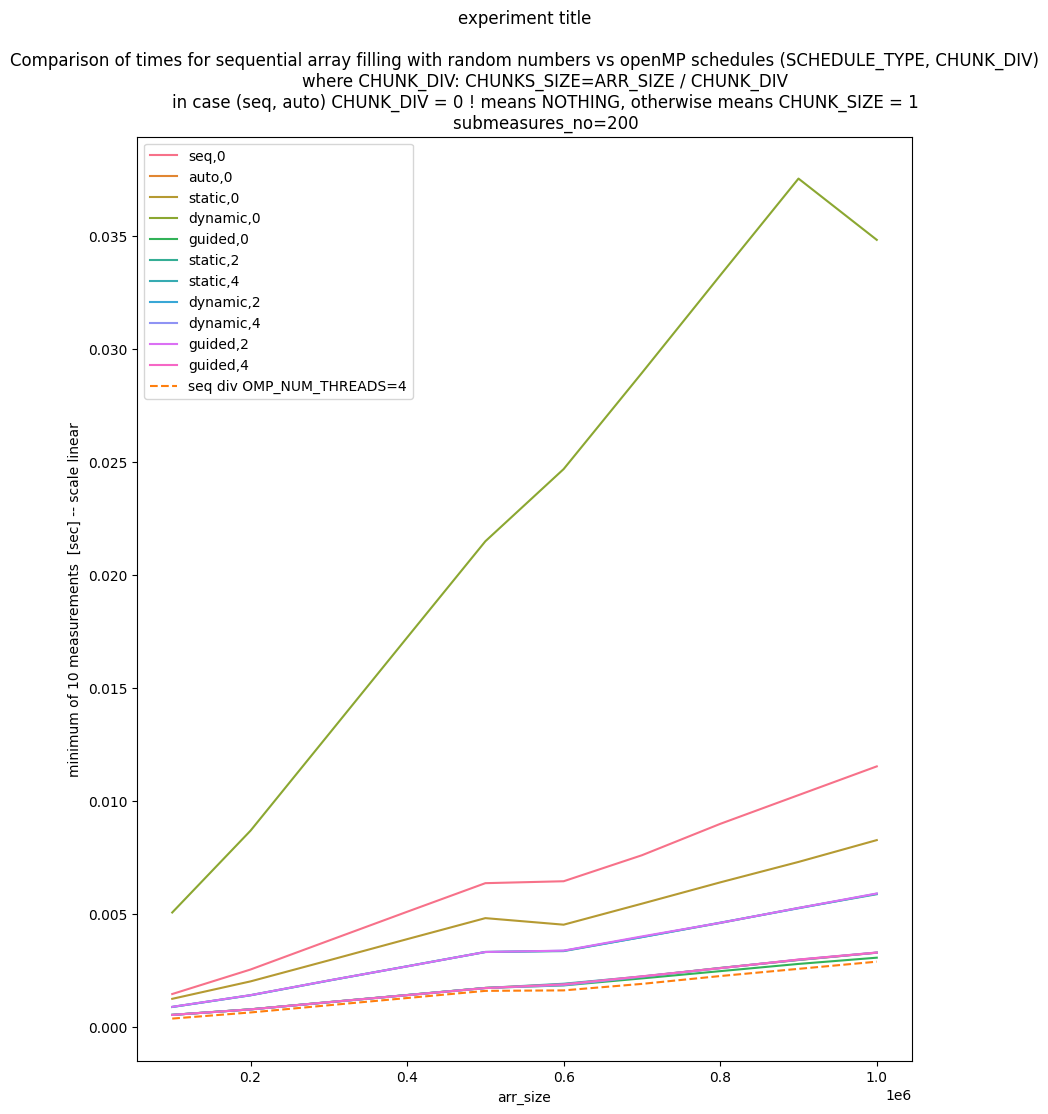

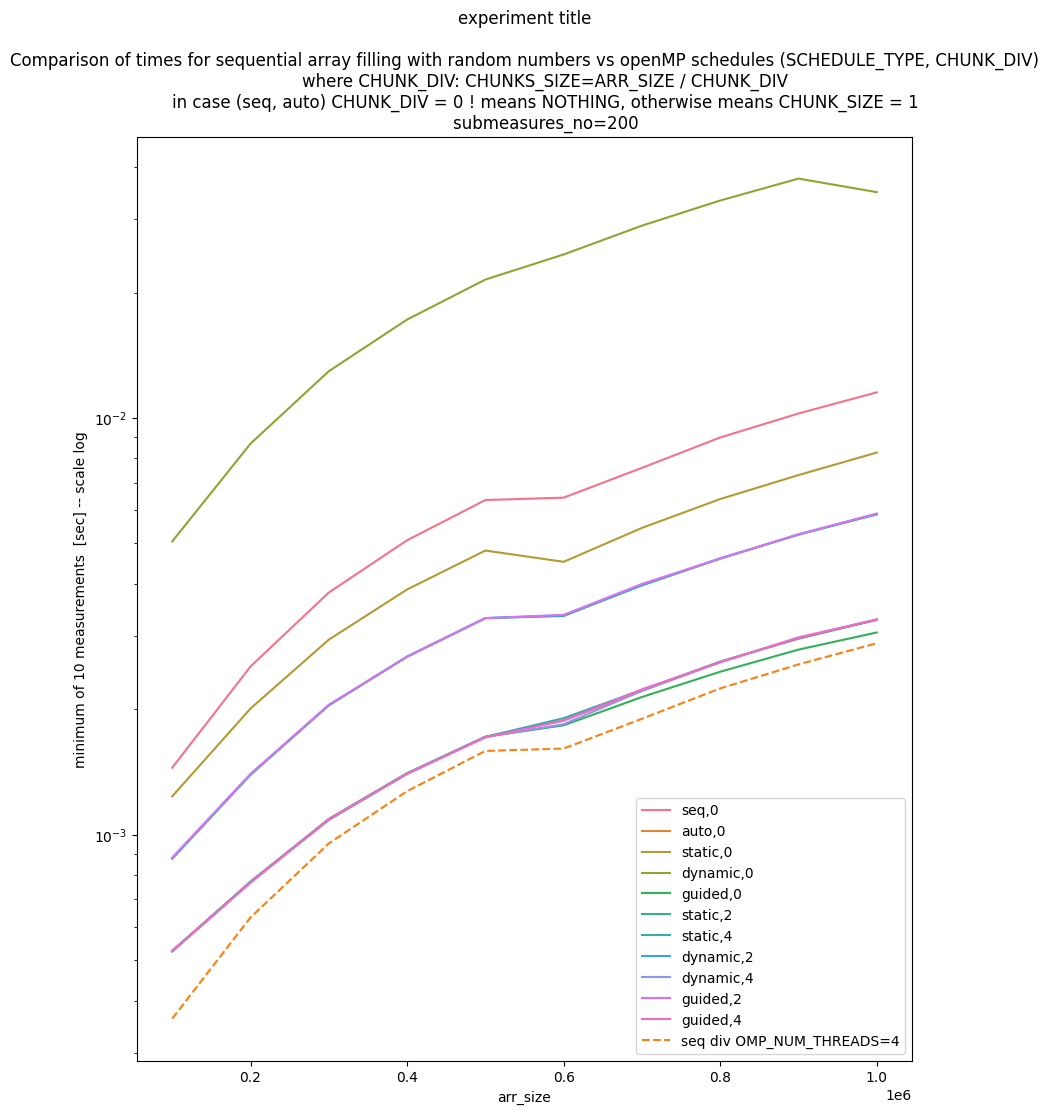

In [103]:
for_meas('build/m.csv', "experiment title")